In [167]:
import pandas as pd 
import numpy as np
import torch


In [168]:
txt = list("hi!hi?")*100
map_dict = {'!':0, '?':1, 'h':2, 'i':3} 

def mapping(txt,map_dict):
    return [map_dict[chr]for chr in txt]
txt_mapped = mapping(txt,map_dict)
txt_mapped

def onehot_encoding(txt_mapped):
    seq_encoded = torch.nn.functional.one_hot(torch.tensor(txt_mapped))
    return seq_encoded.float()
sequence_data = onehot_encoding(txt_mapped)
sequence_data.shape

torch.Size([600, 4])

In [169]:
len(sequence_data)

600

In [170]:
def create_seqdataset(seq_data,seq_length):
    #x = seq_data[:-1]
    #y = seq_data[1:]
    seqs_x = []
    seqs_y = []
    for idx in range(0,len(seq_data)-seq_length):
        seqs_x.append(seq_data[idx:idx+seq_length])
        seqs_y.append(seq_data[idx+seq_length])
    return torch.stack(seqs_x),torch.stack(seqs_y)
    #return seq_x,seq_y

x_data,y_data = create_seqdataset(sequence_data,12)

hi!hi i!hi! !hi!h hi!

In [171]:
x_data.shape,y_data.shape

(torch.Size([588, 12, 4]), torch.Size([588, 4]))

In [172]:
torch.argmax(y_data,dim=1)

tensor([2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3, 1,
        2, 3, 0, 2, 3, 1, 2, 3, 0, 2, 3,

In [173]:
ds = torch.utils.data.TensorDataset(x_data,y_data)
dl = torch.utils.data.DataLoader(ds,batch_size=3,drop_last=True)

In [174]:
y_data.shape

torch.Size([588, 4])

우리가 원하는 input.shape = $(L,N,H_{in}) = (3,3,4)$ or input.shape = $(N,L,H_{in}) = (3,3,4)$

In [175]:
torch.manual_seed(2017)
rnn = torch.nn.RNN(4,20,batch_first = True)
linr = torch.nn.Linear(20,4)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=1e-3)

In [176]:
for epoch in range(50):
    for tr_x,tr_y in dl:
        #1 output
        hidden,hT = rnn(tr_x)
        output = linr(hT[-1])
        #print(output.shape,tr_y.shape)
        #print(tr_x,tr_y)
        #2 loss
        loss = loss_fn(output,tr_y)
        #3 derivative
        loss.backward()
        #4 update & clean
        optimizer.step()
        optimizer.zero_grad()
    if epoch % 10 == 0:
        print(epoch,loss)

0 tensor(0.2825, grad_fn=<DivBackward1>)
10 tensor(0.0023, grad_fn=<DivBackward1>)
20 tensor(0.0005, grad_fn=<DivBackward1>)
30 tensor(0.0001, grad_fn=<DivBackward1>)
40 tensor(4.5616e-05, grad_fn=<DivBackward1>)


```Python
0 tensor(0.2452, grad_fn=<DivBackward1>)
10 tensor(0.0008, grad_fn=<DivBackward1>)
20 tensor(0.0002, grad_fn=<DivBackward1>)
30 tensor(6.0834e-05, grad_fn=<DivBackward1>)
40 tensor(2.1735e-05, grad_fn=<DivBackward1>)
50 tensor(8.0267e-06, grad_fn=<DivBackward1>)
60 tensor(2.9405e-06, grad_fn=<DivBackward1>)
70 tensor(1.1126e-06, grad_fn=<DivBackward1>)
80 tensor(4.3710e-07, grad_fn=<DivBackward1>)
90 tensor(1.5895e-07, grad_fn=<DivBackward1>)
```

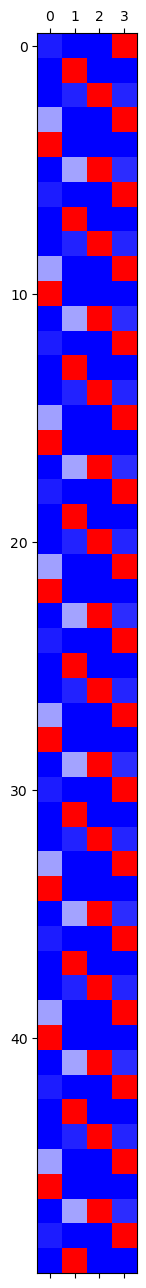

In [177]:
import matplotlib.pyplot as plt
soft = torch.nn.Softmax(dim=1)
hidden,hT = rnn(x_data)
torch.argmax(linr(hT[:,:,:])[0],dim=1)
plt.matshow(linr(hT[:,:,:])[0].data[-50:],cmap="bwr",vmin=-1,vmax=1)